In [1]:
from PIL import Image
from IPython.display import display
import math
import cv2
import numpy as np
import glob

original image size:  (500, 500)
resized image:  (500, 500)


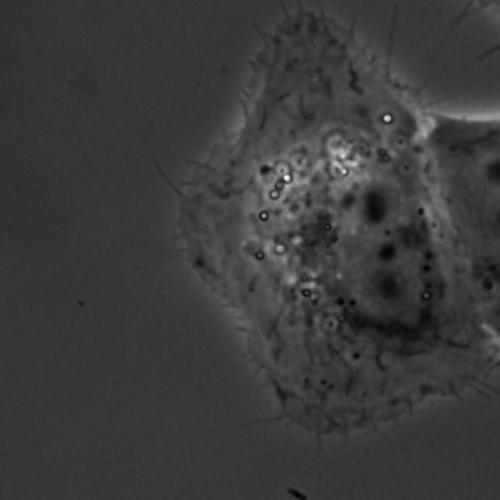

In [2]:
# test

img_size=500

sample_img=Image.open("../dataset_indiv/par1/par1b1_s_001.jpg")
print("original image size: ",sample_img.size)
sample_img_resized = sample_img.resize((img_size,img_size),Image.ANTIALIAS)
print("resized image: ",sample_img_resized.size)
display(sample_img_resized)
sample_img_resized.save("../test_images/image_scaled_single_cell_test.jpg",optimize=True,quality=95)

In [3]:
sample_img_resized.size

(500, 500)

In [4]:
def rot_and_crop_disp(degree, img_size, img):
    img_rot=img.rotate(degree)
    sin_val=math.sin(math.radians(degree))
    cos_val=math.cos(math.radians(degree))
    alpha=img_size*(sin_val*cos_val/(sin_val+cos_val))  # calculated to crop the largest possible area after the rotation
    left=alpha
    upper=alpha
    right=img_size-alpha
    lower=img_size-alpha
    img_crop=img_rot.crop((left,upper,right,lower))
    print("img_rot.size",img_rot.size )
    print("left, upper, right, lower",left,upper,right,lower)
    print("img_crop.size", img_crop.size)
    return display(img_crop)

In [5]:
img_size=sample_img.size[0]
print("img_size: ",img_size)

img_size:  500


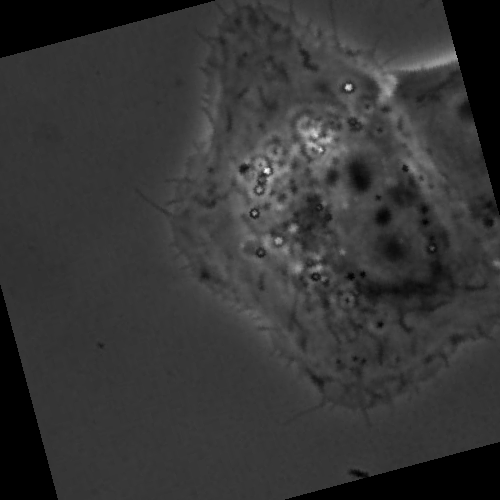

In [6]:
sample_img.rotate(15)

img_rot.size (500, 500)
left, upper, right, lower 102.06207261596576 102.06207261596576 397.93792738403425 397.93792738403425
img_crop.size (296, 296)


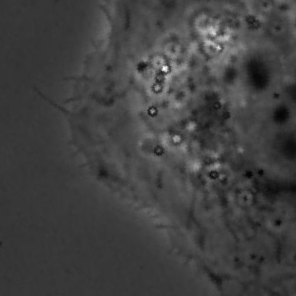

In [16]:
rot_and_crop_disp(15, img_size, sample_img)

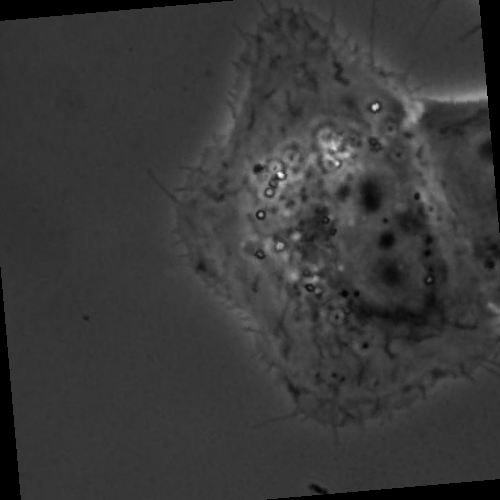

In [7]:
sample_img.rotate(5)

img_rot.size (500, 500)
left, upper, right, lower 40.072023585550006 40.072023585550006 459.92797641445 459.92797641445
img_crop.size (420, 420)


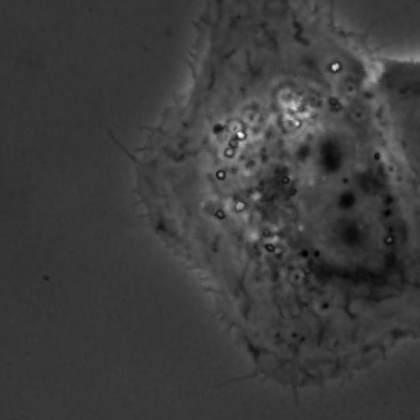

In [8]:
rot_and_crop_disp(5, img_size, sample_img)

img_rot.size (500, 500)
left, upper, right, lower 40.07202358554999 40.07202358554999 459.92797641445003 459.92797641445003
img_crop.size (420, 420)


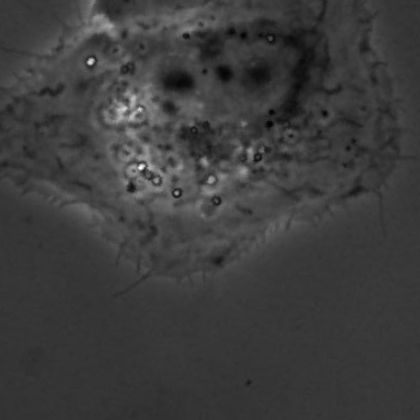

In [9]:
rot_and_crop_disp(85, img_size, sample_img)

img_rot.size (500, 500)
left, upper, right, lower 47.75597807059915 47.75597807059915 452.24402192940084 452.24402192940084
img_crop.size (404, 404)


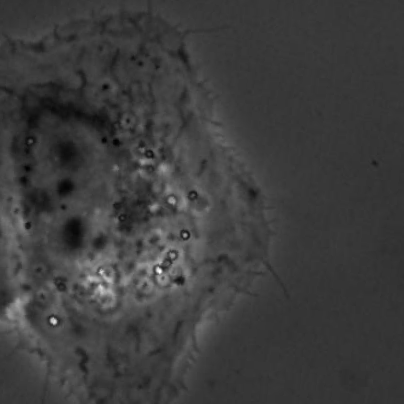

In [10]:
rot_and_crop_disp(175, img_size, sample_img)

In [ ]:
rot_and_crop_disp(85, img_size, sample_img)

In [17]:
def rot_and_crop_conv(degree, img_size, img):
    img_rot=img.rotate(degree)
    sin_val=math.sin(math.radians(degree))
    cos_val=math.cos(math.radians(degree))
    alpha=img_size*(sin_val*cos_val/(sin_val+cos_val))  # calculated to crop the largest possible area after the rotation
    left=alpha
    upper=alpha
    right=img_size-alpha
    lower=img_size-alpha
    img_crop=img_rot.crop((left,upper,right,lower))
    return img_crop

In [18]:
images_all = glob.glob("../dataset_indiv/par1/*.jpg")

mult_deg=1
count=1
# rotate from 0 to 10 degrees by 1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(10):   # then total 1*10 = 10 degree rotation per image
            degree=i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
#             str_conv = "../dataset_indiv_rotated/par1/"
            str_conv = "../single_cell_re_aug/par1/"
            img_conv.save(f'{str_conv}/par1_rot0to10_{count}_{i}.jpg')
    count=count+1

In [19]:
images_all = glob.glob("../dataset_indiv/wt/*.jpg")

mult_deg=1
count=1
# rotate from 0 to 10 degrees by 1
for image in images_all:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
        for i in range(10):   # then total 1*10 = 10 degree rotation per image
            degree=i*mult_deg       
            img_conv = rot_and_crop_conv(degree, img_size, img)
#             str_conv = "../dataset_indiv_rotated/wt/"
            str_conv = "../single_cell_re_aug/wt/"            
            img_conv.save(f'{str_conv}/wt_rot0to10_{count}_{i}.jpg')
    count=count+1